<a href="https://colab.research.google.com/github/UnitForDataScience/Microplastic_Image_Analysis/blob/master/Microplastics_Image_Isolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -------------------------------------------------------------------------------
# Name: isolate.py
# Purpose: Base code to begin working with Microplastics data
#
# Author(s):    David Little
#
# Created:      09/01/2020
# Updated:
# Update Comment(s):
#
# TO DO:
#
# -------------------------------------------------------------------------------

import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [6]:
#Import example image
from skimage import io

img = io.imread("https://raw.githubusercontent.com/UnitForDataScience/Microplastic_Image_Analysis/master/MP_pics/isolate/type_3_uniform/PP%209d001-MERGE-0.jpeg")

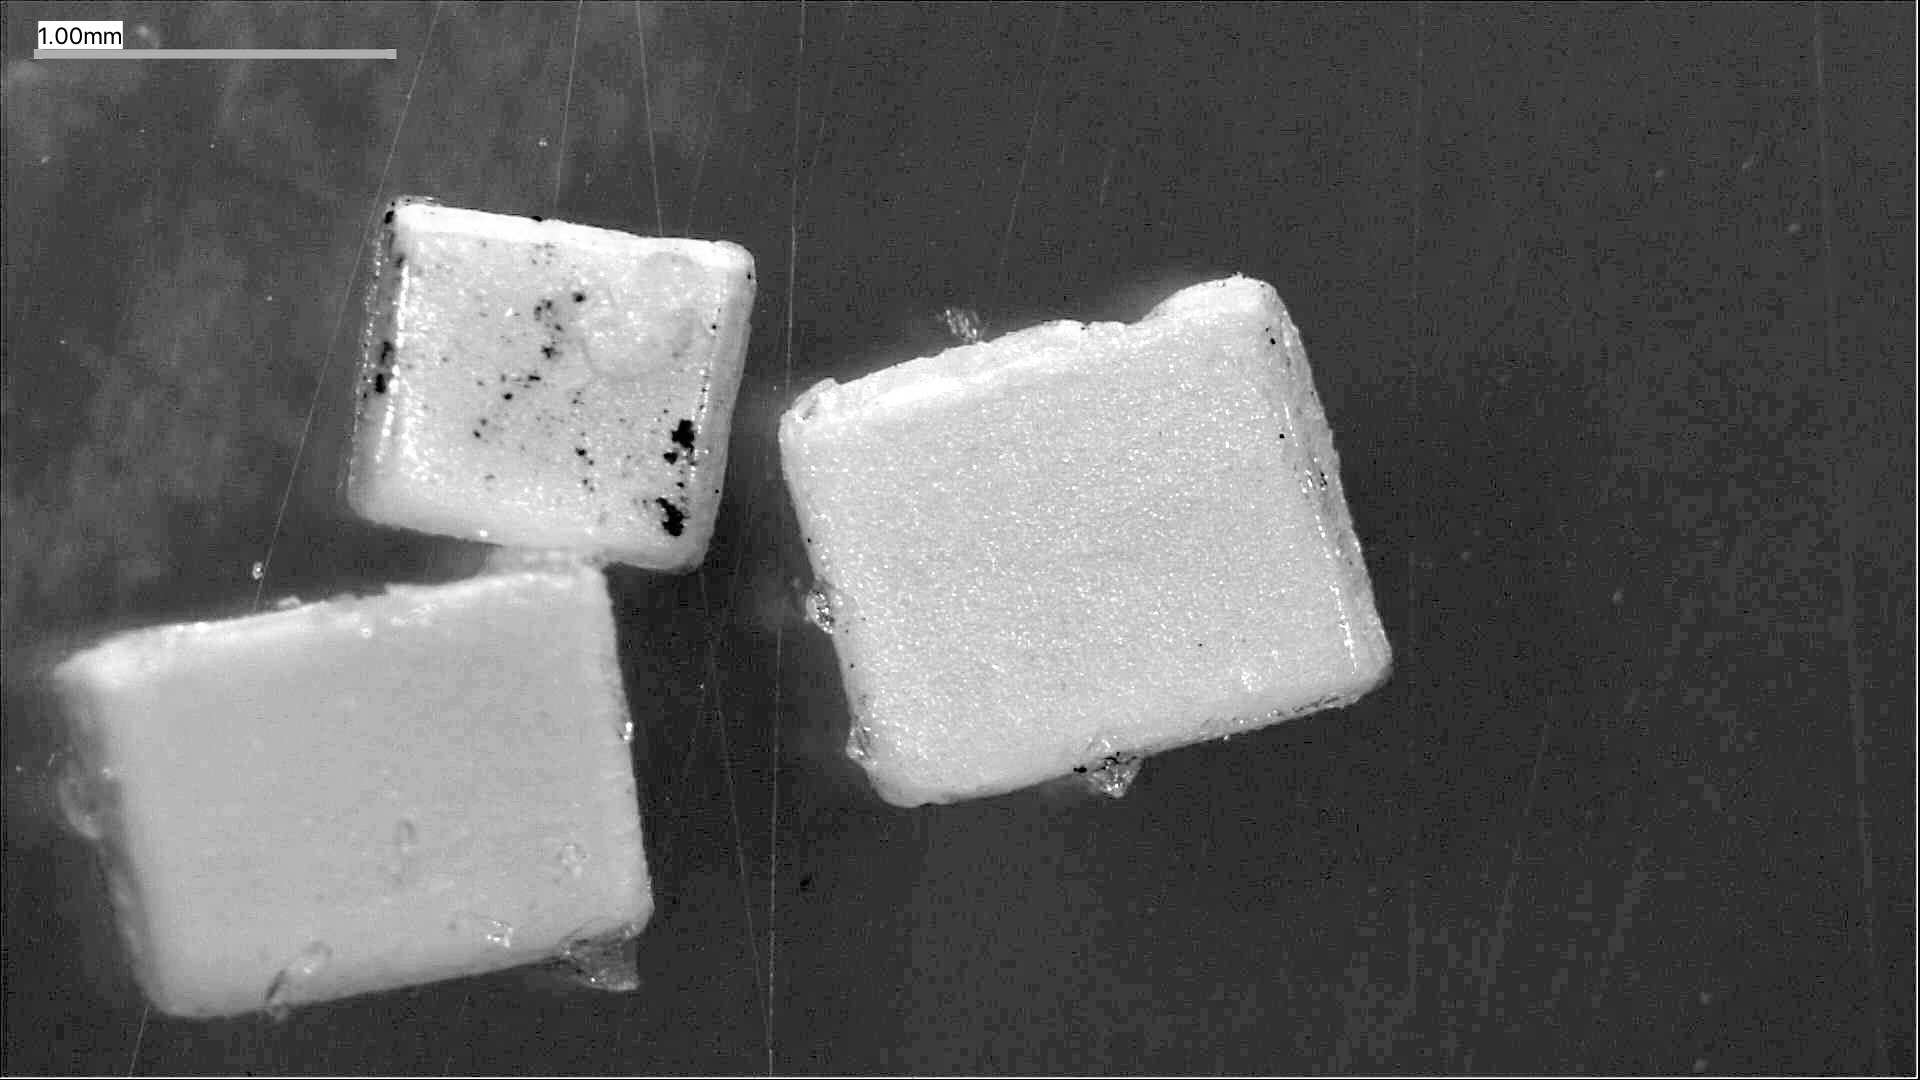

In [8]:
#Convert image to black and white and display

mp_1_BW = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #change to grayscale
cv2_imshow(mp_1_BW) #this is for native openCV display

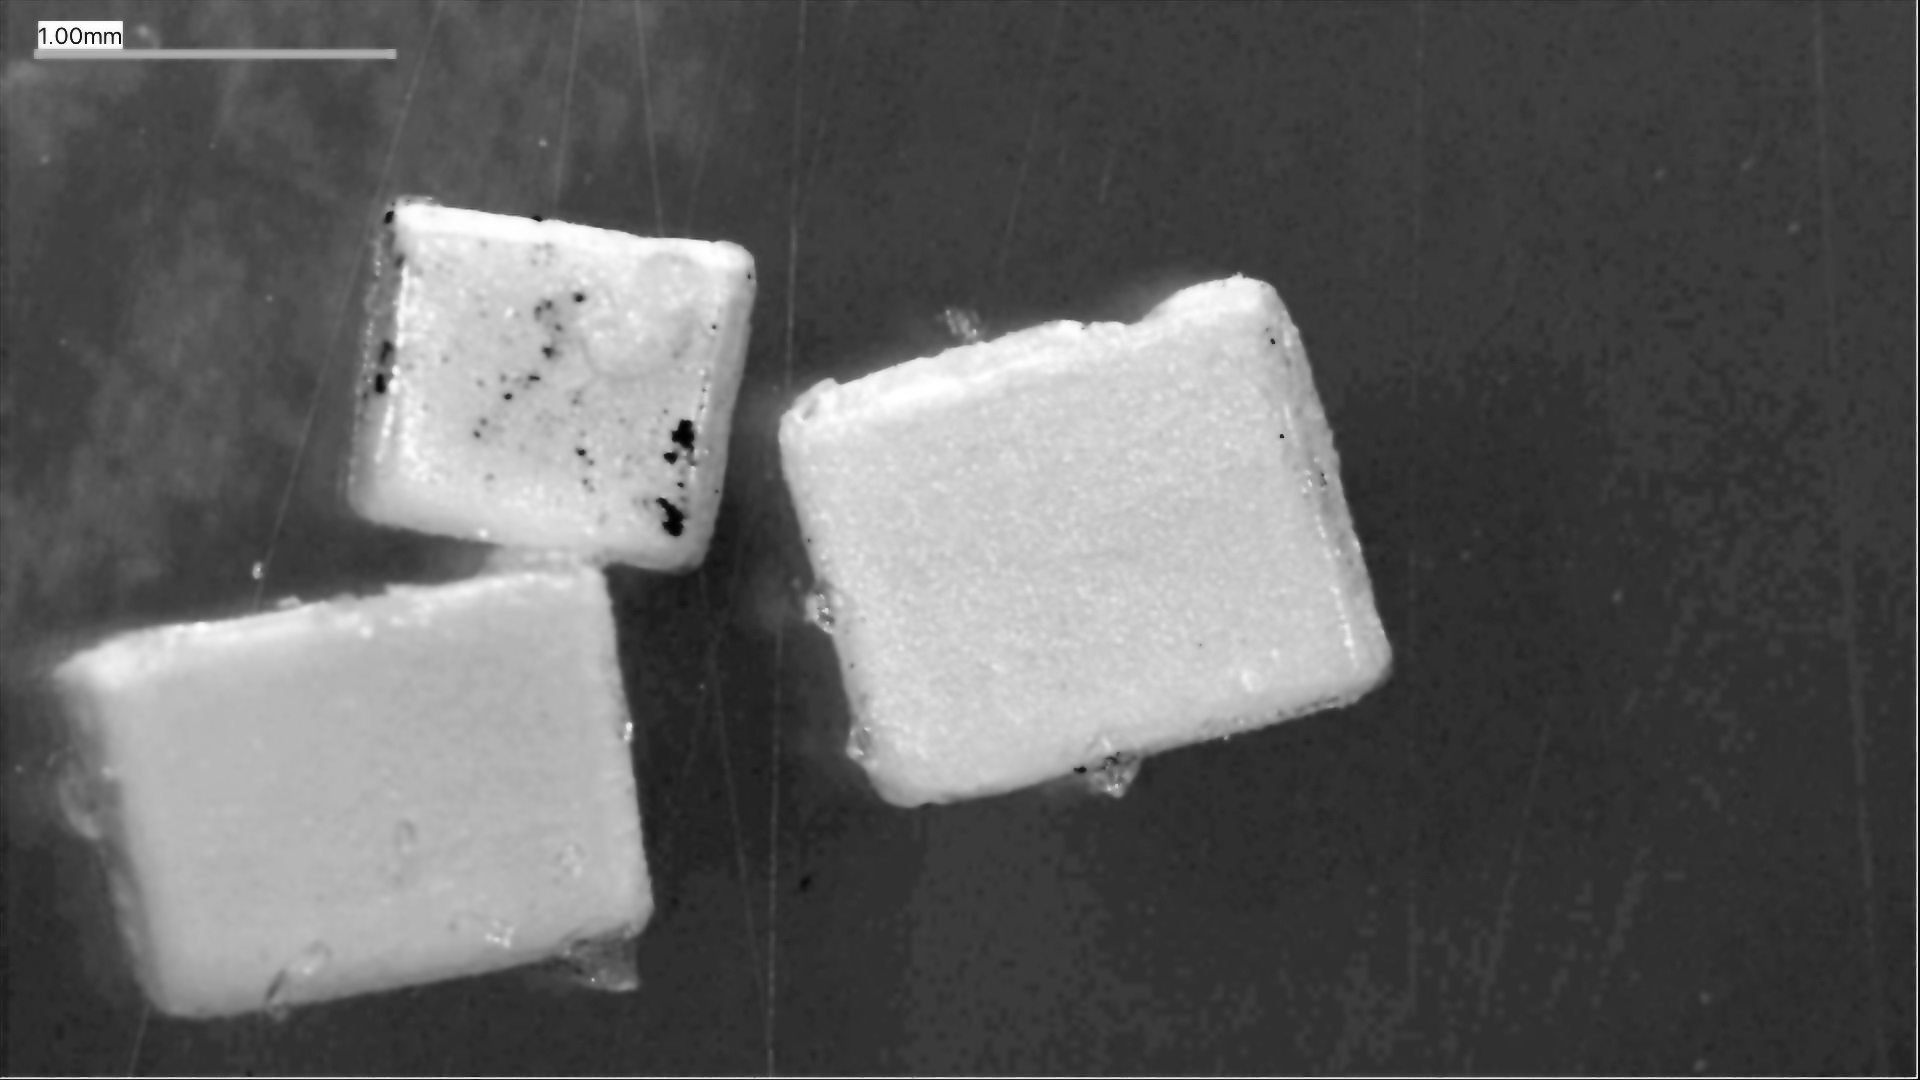

In [13]:
# Blur the image to remove noise
#mp_1_BW_blur = cv2.GaussianBlur(mp_1_BW,(5,5),0)
mp_1_BW_blur = cv2.bilateralFilter(mp_1_BW,9,75,75)
cv2_imshow(mp_1_BW_blur)

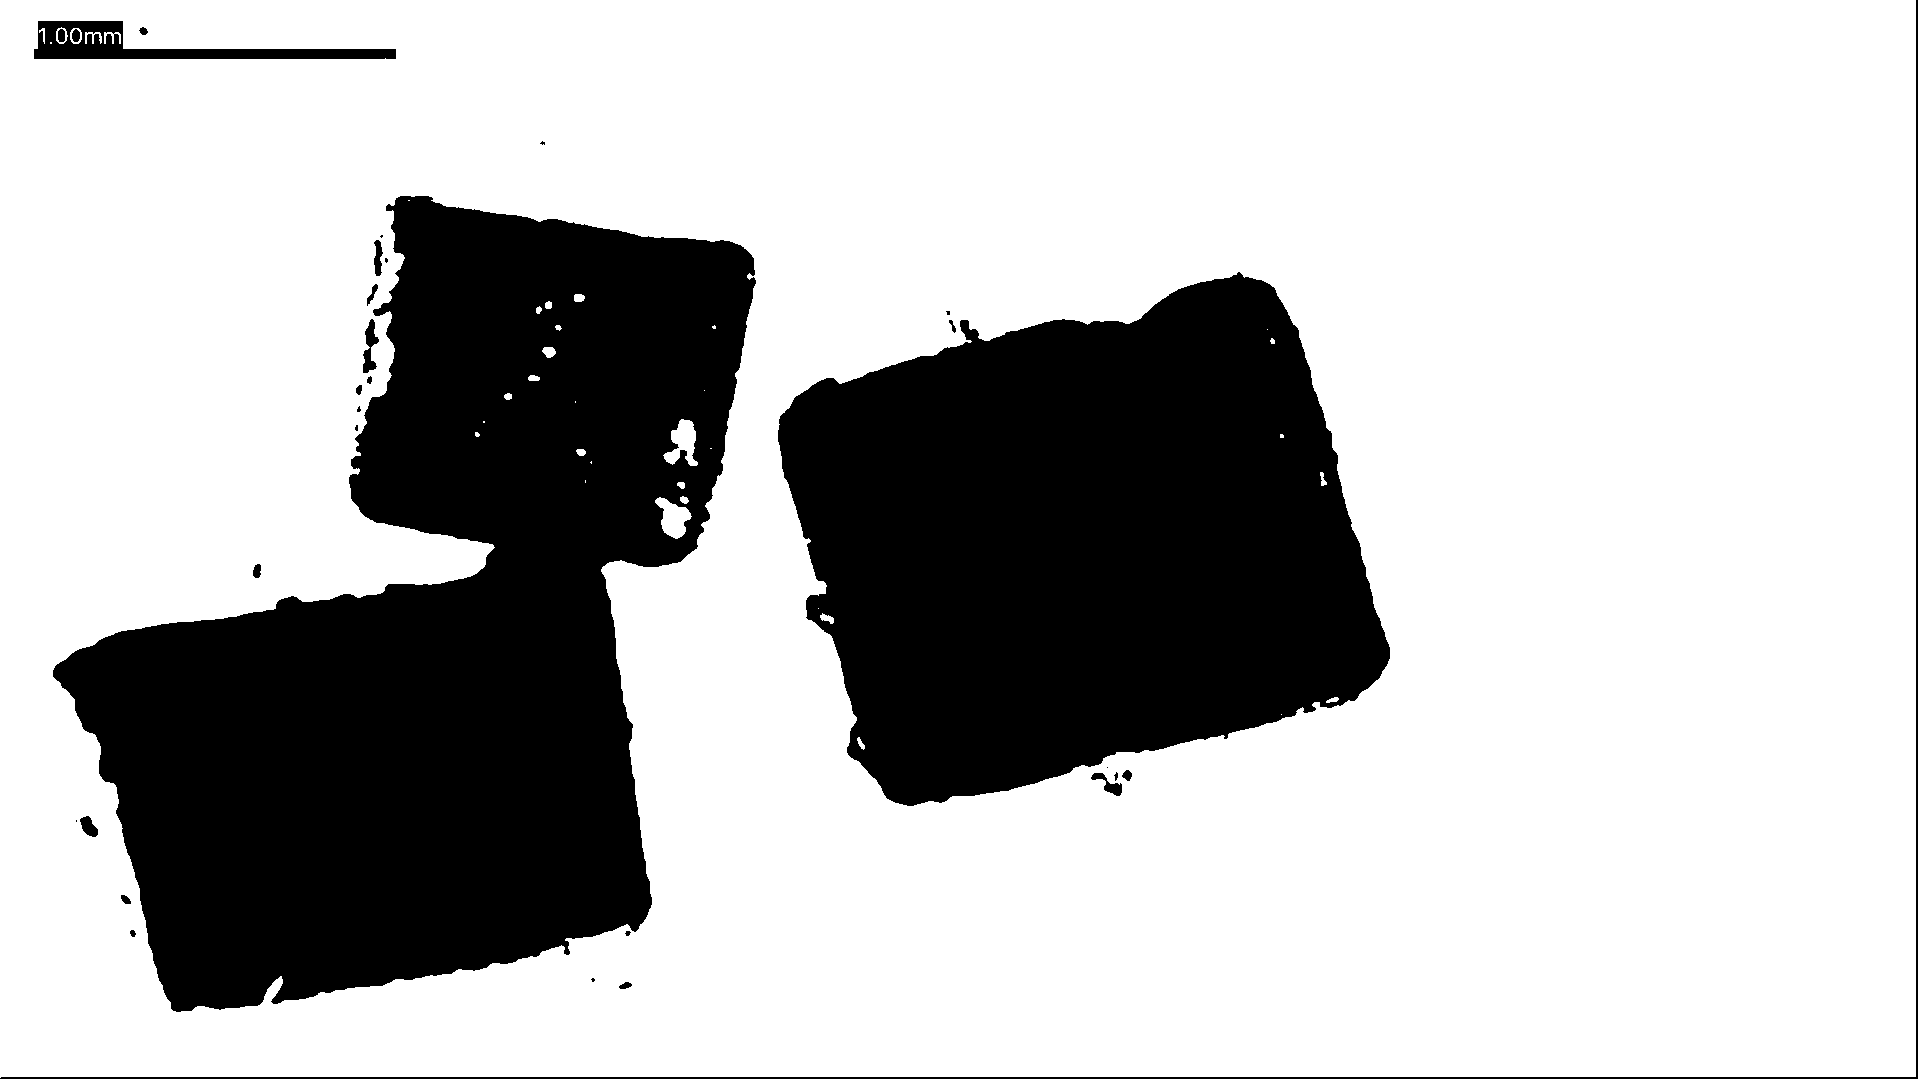

In [14]:
# Identifying thresholds
ret,thresh = cv2.threshold(mp_1_BW_blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(thresh)


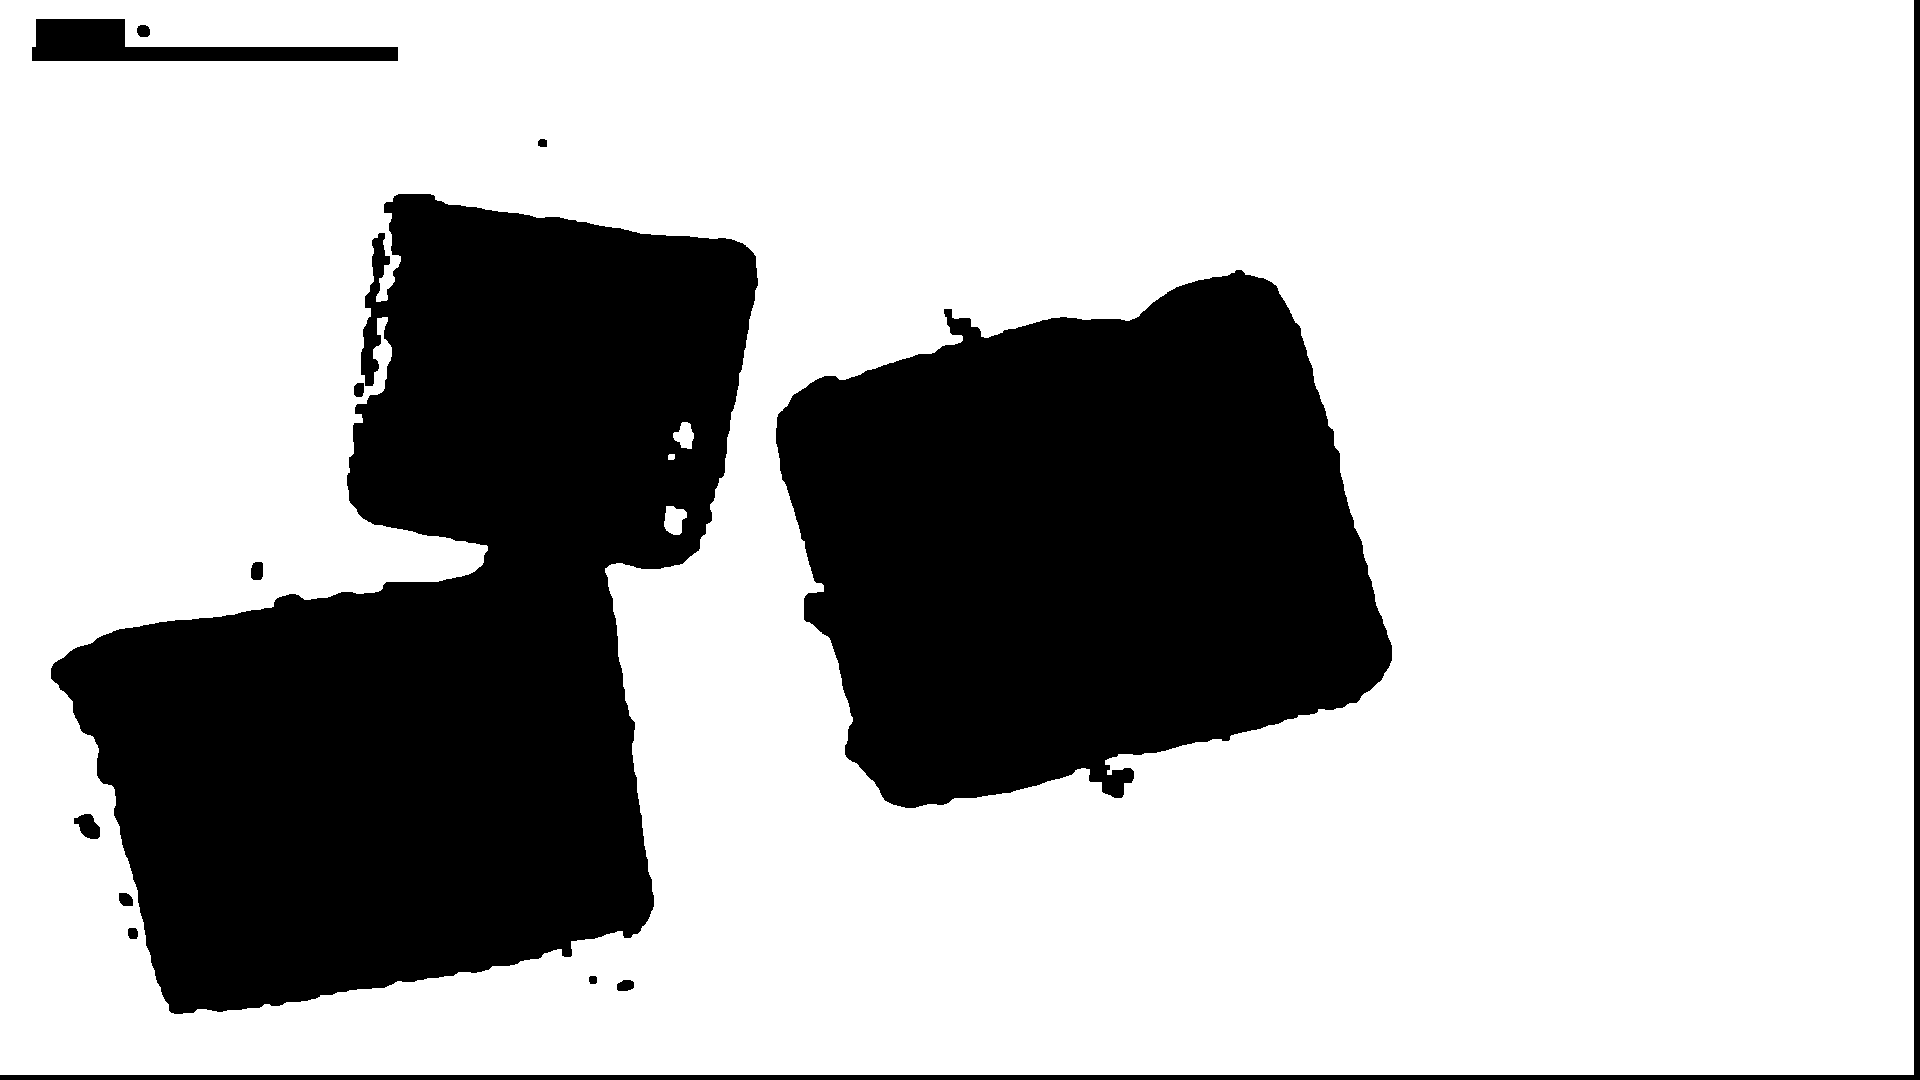

In [15]:
# Eroding the edges
kernel = np.ones((5,5),np.uint8) #square image kernel used for erosion
erosion = cv2.erode(thresh, kernel,iterations = 1) #refines all edges in the binary image

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) #this is for further removing small noises and holes in the image
cv2_imshow(closing)



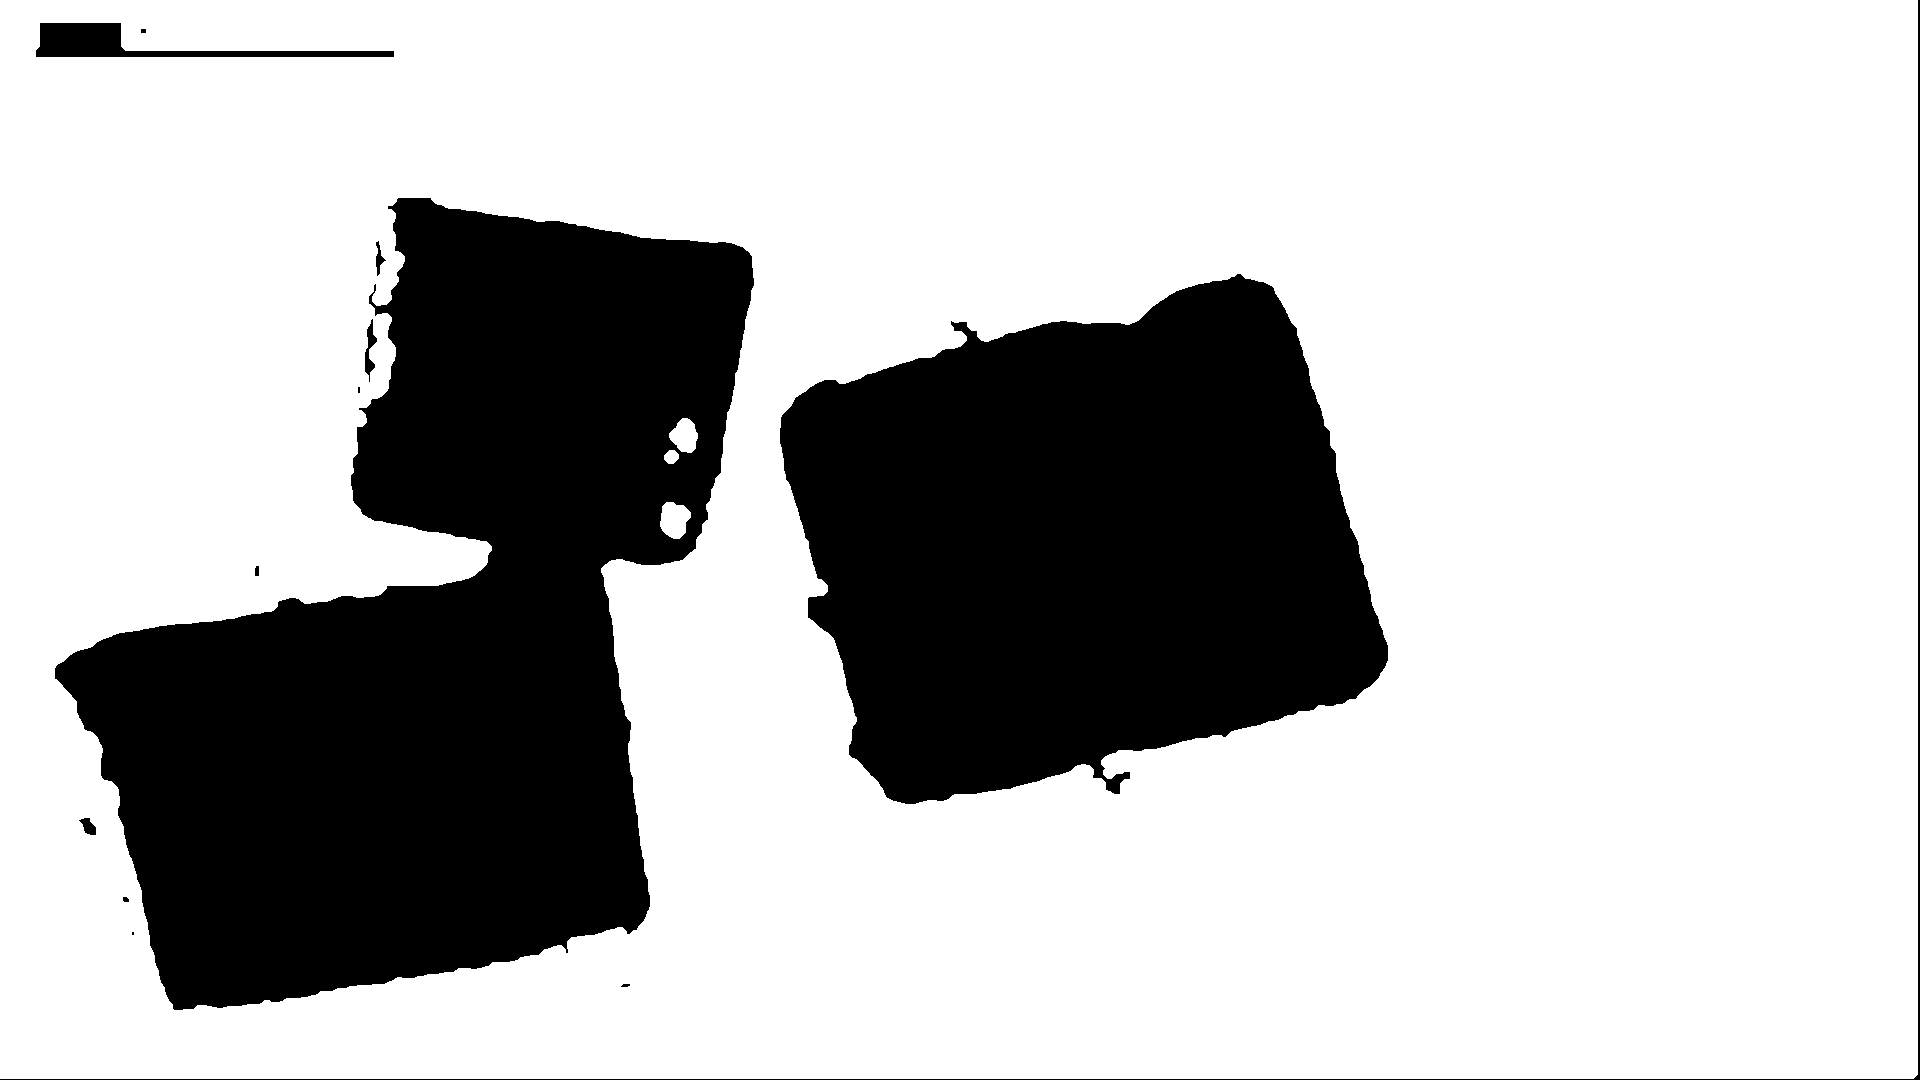

In [18]:
# Finding contours
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) #find contours with simple approximation

cont = cv2.drawContours(closing, contours, -1, (255, 255, 255), 4)
cv2_imshow(cont)

